<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/monty_hall_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Problema de Monty Hall**
O Problema de Monty Hall é um quebra-cabeça de probabilidade baseado no programa de televisão americano [_Let's Make a Deal_](https://youtu.be/7BqIXJFtsPw?si=8nn43huDKL7_ST2W), cujo apresentador original se chamava, Monty Hall.

**O problema é o seguinte**:

Suponha participar em um _game show_ para ganhar um prêmio, onde terá a opção de escolher entre três portas. Atrás de uma porta há um carro e atrás das outras duas, cabras.

Digamos que sua escolha inicial seja a porta `Nº 1`. O apresentador sabendo o que está por trás das demias portas, abre outra porta, digamos a `Nº 3`, que tem uma cabra. Então, ele diz: "Você quer manter sua escolha ou mudar para a porta `Nº 2`?"  

**E aí, é vantajoso manter ou trocar  sua escolha?**

Descubra a resposta a seguir...

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

Digite o número de simulações (ex: 10000): 100
Escolha a estratégia (manter/trocar/ambas): trocar
Se trocar de porta: 71.00% de chance de ganhar o carro.


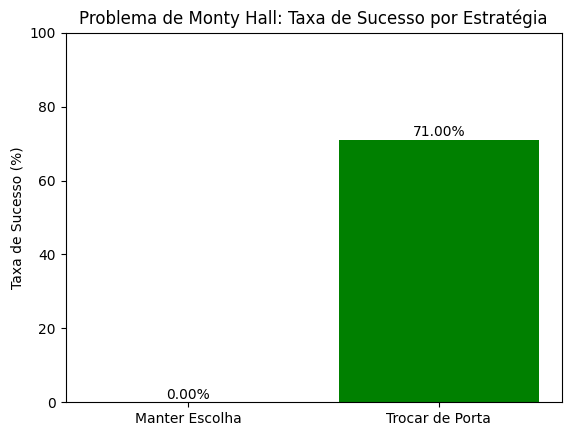

In [8]:
def monty_hall_simulation(num_simulations=10000, switch=True):
    """Simula o problema de Monty Hall e retorna a taxa de sucesso ao trocar ou manter a escolha inicial."""
    wins = 0  # Contador de vitórias

    for _ in range(num_simulations):
        # Passo 1: Esconder o carro aleatoriamente atrás de uma das três portas
        doors = ['Goat', 'Goat', 'Car']
        random.shuffle(doors)

        # Passo 2: O jogador escolhe uma porta aleatoriamente
        player_choice = random.randint(0, 2)

        # Passo 3: O apresentador revela uma porta que contém uma cabra
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 'Goat']
        monty_reveal = random.choice(remaining_doors)

        # Passo 4: O jogador decide se troca ou não
        if switch:
            # Ele troca para a única porta restante
            available_doors = [i for i in range(3) if i != player_choice and i != monty_reveal]
            player_choice = available_doors[0]  # Só resta uma opção

        # Verifica se o jogador ganhou o carro
        if doors[player_choice] == 'Car':
            wins += 1

    return wins / num_simulations  # Retorna a taxa de sucesso

def plot_results(stay_win_rate, switch_win_rate):
    """Plota os resultados da simulação."""
    labels = ['Manter Escolha', 'Trocar de Porta']
    win_rates = [stay_win_rate * 100, switch_win_rate * 100]

    plt.bar(labels, win_rates, color=['blue', 'green'])
    plt.ylabel('Taxa de Sucesso (%)')
    plt.title('Problema de Monty Hall: Taxa de Sucesso por Estratégia')
    plt.ylim(0, 100)

    for i, v in enumerate(win_rates):
        plt.text(i, v + 1, f"{v:.2f}%", ha='center')

    plt.show()

def main():
    # Solicita ao usuário o número de simulações
    num_simulations = int(input("Digite o número de simulações (ex: 10000): "))

    # Solicita ao usuário a estratégia
    strategy = input("Escolha a estratégia (manter/trocar/ambas): ").strip().lower()

    # Executa a simulação de acordo com a escolha do usuário
    if strategy == 'manter':
        stay_win_rate = monty_hall_simulation(num_simulations, switch=False)
        print(f"Se mantiver a escolha inicial: {stay_win_rate * 100:.2f}% de chance de ganhar o carro.")
        plot_results(stay_win_rate, 0)
    elif strategy == 'trocar':
        switch_win_rate = monty_hall_simulation(num_simulations, switch=True)
        print(f"Se trocar de porta: {switch_win_rate * 100:.2f}% de chance de ganhar o carro.")
        plot_results(0, switch_win_rate)
    elif strategy == 'ambas':
        stay_win_rate = monty_hall_simulation(num_simulations, switch=False)
        switch_win_rate = monty_hall_simulation(num_simulations, switch=True)
        print(f"Se mantiver a escolha inicial: {stay_win_rate * 100:.2f}% de chance de ganhar o carro.")
        print(f"Se trocar de porta: {switch_win_rate * 100:.2f}% de chance de ganhar o carro.")
        plot_results(stay_win_rate, switch_win_rate)
    else:
        print("Escolha inválida. Por favor, escolha entre 'manter', 'trocar' ou 'ambas'.")

if __name__ == "__main__":
    main()

**A Controvérsia: intuição vs. lógica**

Intuitivamente, muitas pessoas acreditariam que, após a revelação de uma das cabras, as duas portas restantes têm uma chance igual (50%) de conter o carro. Correto?

No entanto, a análise acima mostra que este não é o caso. Pois o apresentador, ao saber em que porta o carro está, **sempre revelará uma cabra**, maximizando as chances de acerto do participante.

A probabilidade correta é que trocar de porta dá ao participante uma chance de 2/3 (≈66,67%) de ganhar o carro, enquanto manter a escolha inicial resulta em uma chance de apenas 1/3 (≈33,33%).

| Atrás da porta 1 | Atrás da porta 2 | Atrás da porta 3 | Resultado se manter porta #1 | Resultado se trocar para a porta oferecida |
|-----------------|-----------------|-----------------|----------------------------------|---------------------------------|
|🐐 Cabra          | 🐐Cabra          | 🚗 Carro       | Ganha uma cabra 🫤                 | **Ganha o carro**              |
| 🐐Cabra          | 🚗 Carro       | 🐐Cabra          | Ganha uma cabra 🫤                 | **Ganha o carro**              |
| 🚗 Carro       | 🐐Cabra          | 🐐Cabra          | **Ganha o carro**               | Ganha uma cabra🫤                |


**Por Que Trocar é Melhor?**

Quando o participante faz a escolha inicial, há uma probabilidade de 1/3 de que ele tenha selecionado o carro e 2/3 de que o carro esteja em uma das outras duas portas.

Quando o apresentador revela uma cabra, ele está fornecendo informações adicionais. Se o carro estiver atrás de uma das duas portas não escolhidas (probabilidade de 2/3), trocar de porta garantirá a vitória.

Portanto, **trocar** de porta aproveita a probabilidade inicial de **2/3**, enquanto manter a escolha inicial mantém a probabilidade inicial de 1/3.

**Lógica de funcionamento do código**
1. O carro é aleatoriamente colocado atrás de uma das três portas.
2. O jogador faz uma escolha inicial.
3. O apresentador sempre revela uma porta com uma cabra.
4. O jogador pode optar por manter ou trocar de porta.
5. O código simula esse jogo 10.000 vezes para cada estratégia e calcula a taxa de sucesso.

In [9]:
def monty_hall_simulation(num_simulations=10000, switch=True):
    """Simula o problema de Monty Hall e retorna a taxa de sucesso ao trocar ou manter a escolha inicial."""
    wins = 0  # Contador de vitórias

    for _ in range(num_simulations):
        # Passo 1: Esconder o carro aleatoriamente atrás de uma das três portas
        doors = ['Goat', 'Goat', 'Car']
        random.shuffle(doors)

        # Passo 2: O jogador escolhe uma porta aleatoriamente
        player_choice = random.randint(0, 2)

        # Passo 3: O apresentador revela uma porta que contém uma cabra
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 'Goat']
        monty_reveal = random.choice(remaining_doors)

        # Passo 4: O jogador decide se troca ou não
        if switch:
            # Ele troca para a única porta restante
            available_doors = [i for i in range(3) if i != player_choice and i != monty_reveal]
            player_choice = available_doors[0]  # Só resta uma opção

        # Verifica se o jogador ganhou o carro
        if doors[player_choice] == 'Car':
            wins += 1

    return wins / num_simulations  # Retorna a taxa de sucesso

# Simulando 10000 jogos para ambas as estratégias
num_simulations = 10000
stay_win_rate = monty_hall_simulation(num_simulations, switch=False)
switch_win_rate = monty_hall_simulation(num_simulations, switch=True)

print(f"Se mantiver a escolha inicial: {stay_win_rate * 100:.2f}% de chance de ganhar o carro.")
print(f"Se trocar de porta: {switch_win_rate * 100:.2f}% de chance de ganhar o carro.")


Se mantiver a escolha inicial: 33.18% de chance de ganhar o carro.
Se trocar de porta: 66.75% de chance de ganhar o carro.


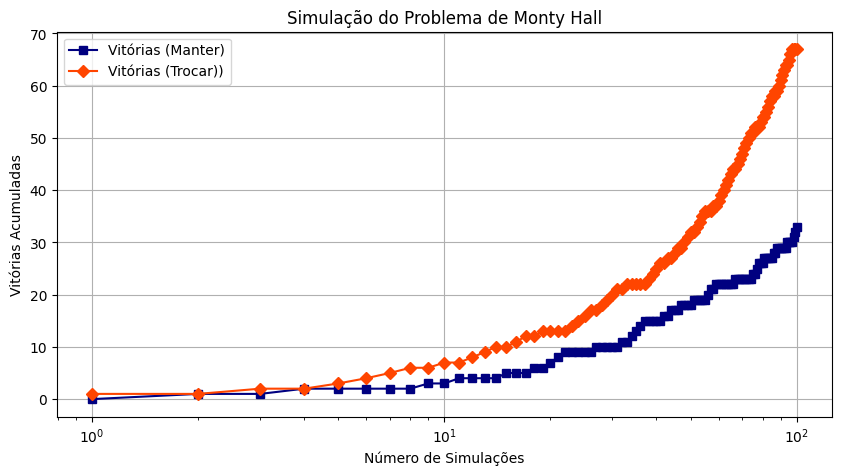

In [12]:
def monty_hall_simulation(num_simulations=100):
    """Simula o problema de Monty Hall e registra vitórias acumuladas para cada estratégia."""
    stay_wins = 0
    switch_wins = 0

    stay_results = []
    switch_results = []

    for i in range(1, num_simulations + 1):
        doors = ['Goat', 'Goat', 'Car']
        np.random.shuffle(doors)  # Aleatoriza as portas

        # Jogador escolhe uma porta aleatória
        player_choice = np.random.randint(0, 3)

        # Monty revela uma porta com uma cabra
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 'Goat']
        monty_reveal = np.random.choice(remaining_doors)

        # Porta disponível para troca
        switch_choice = [i for i in range(3) if i != player_choice and i != monty_reveal][0]

        # Resultados ao manter ou trocar a escolha
        if doors[player_choice] == 'Car':
            stay_wins += 1
        if doors[switch_choice] == 'Car':
            switch_wins += 1

        stay_results.append(stay_wins)
        switch_results.append(switch_wins)

    return stay_results, switch_results

# Simulando 100 partidas
num_simulations = 100
stay_wins, switch_wins = monty_hall_simulation(num_simulations)

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_simulations + 1), stay_wins, marker='s', linestyle='-', color='navy', label='Vitórias (Manter)')
plt.plot(range(1, num_simulations + 1), switch_wins, marker='D', linestyle='-', color='orangered', label='Vitórias (Trocar))')

plt.xlabel("Número de Simulações")
plt.ylabel("Vitórias Acumuladas")
plt.legend()
plt.title("Simulação do Problema de Monty Hall")
plt.xscale("log")  # Aplicando escala logarítmica no eixo X para melhor visualização
plt.grid(True)
plt.show()

Digite o número de simulações (ex: 10000): 100
Vitórias ao manter a escolha inicial: 32 (32.00%)
Vitórias ao trocar de porta: 68 (68.00%)


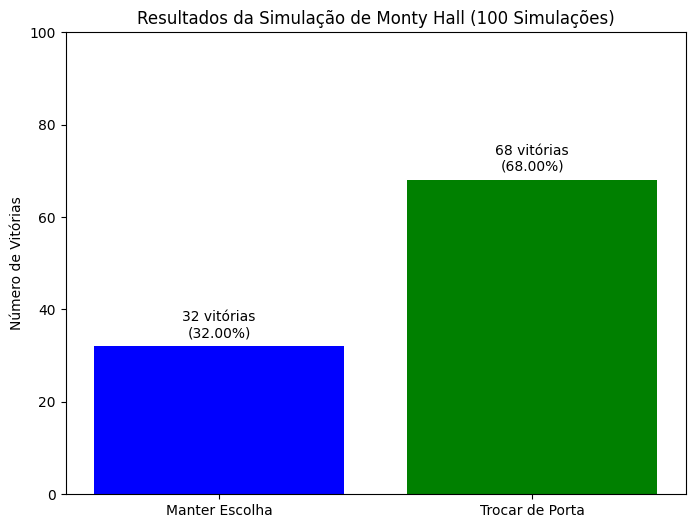

In [14]:
def plot_simulation_results(stay_wins, switch_wins, num_simulations):
    """Plota os resultados da simulação de forma detalhada."""
    labels = ['Manter Escolha', 'Trocar de Porta']
    wins = [stay_wins, switch_wins]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, wins, color=['blue', 'green'])
    plt.ylabel('Número de Vitórias')
    plt.title(f'Resultados da Simulação de Monty Hall ({num_simulations} Simulações)')
    plt.ylim(0, num_simulations)

    for i, v in enumerate(wins):
        plt.text(i, v + 0.02 * num_simulations, f"{v} vitórias\n({v / num_simulations * 100:.2f}%)", ha='center')

    plt.show()

def monty_hall_simulation_with_counts(num_simulations=10000):
    """Simula o problema de Monty Hall e retorna o número de vitórias para ambas as estratégias."""
    stay_wins = 0  # Contador de vitórias ao manter a escolha
    switch_wins = 0  # Contador de vitórias ao trocar de porta

    for _ in range(num_simulations):
        # Passo 1: Esconder o carro aleatoriamente atrás de uma das três portas
        doors = ['Goat', 'Goat', 'Car']
        random.shuffle(doors)

        # Passo 2: O jogador escolhe uma porta aleatoriamente
        player_choice = random.randint(0, 2)

        # Passo 3: O apresentador revela uma porta que contém uma cabra
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 'Goat']
        monty_reveal = random.choice(remaining_doors)

        # Passo 4: Verifica vitórias ao manter a escolha
        if doors[player_choice] == 'Car':
            stay_wins += 1

        # Passo 5: Verifica vitórias ao trocar de porta
        available_doors = [i for i in range(3) if i != player_choice and i != monty_reveal]
        if doors[available_doors[0]] == 'Car':
            switch_wins += 1

    return stay_wins, switch_wins

def main():
    # Solicita ao usuário o número de simulações
    num_simulations = int(input("Digite o número de simulações (ex: 10000): "))

    # Executa a simulação e obtém os resultados
    stay_wins, switch_wins = monty_hall_simulation_with_counts(num_simulations)

    # Exibe os resultados no console
    print(f"Vitórias ao manter a escolha inicial: {stay_wins} ({stay_wins / num_simulations * 100:.2f}%)")
    print(f"Vitórias ao trocar de porta: {switch_wins} ({switch_wins / num_simulations * 100:.2f}%)")

    # Plota os resultados
    plot_simulation_results(stay_wins, switch_wins, num_simulations)

if __name__ == "__main__":
    main()

## **Referências**

WIKIPEDIA. Monty Hall problem. Disponível em: https://en.wikipedia.org/wiki/Monty_Hall_problem. Acesso em: 10 fev. 2025.